In [1]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans

### Step 1: Read in the `shopping_data.csv` file and create the DataFrame. Review the resulting DataFrame. Additionally, check the data types associated with the DataFrame.

In [2]:
# Read in the CSV file and create the Pandas DataFrame
df_shopping = pd.read_csv("https://static.bc-edx.com/mbc/ai/m2/datasets/shopping-data.csv")

# Review the DataFrame
df_shopping.head()

,CustomerID,Card Type,Age,Annual Income,Spending Score
0,1,Credit,19,15000,39
1,2,Credit,21,15000,81
2,3,Debit,20,16000,6
3,4,Debit,23,16000,77
4,5,Debit,31,17000,40


In [3]:
# Check the DataFrame data types
df_shopping.dtypes

CustomerID         int64
Card Type         object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

### Step 2: Use the `encodeCard` function that sets the `card_type` variable to 1 for credit card purchases and 0 for debit card purchases. 

In [5]:
# Build the encodeCard helper function
# Credit card purchases should encode to 1
# Debit card purchases should encode to 0
def encodeCard(card_type):
    """
    This function encodes a card type by setting credit card purchases to 1 and debit cards to 0.
    """
    if card_type.lower() == "credit":
        return 1
    else:
        return 0

### Step 3: Edit the `Card Type` column in the DataFrame by applying the `encodeCard` function. 

In [6]:
# Edit the `Card Type` column using the encodeCard function
df_shopping['Card Type'] = df_shopping['Card Type'].map(lambda x : encodeCard(x))

# Review the DataFrame
df_shopping['Card Type']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Card Type, Length: 200, dtype: int64

In [8]:
df_shopping.head()

,CustomerID,Card Type,Age,Annual Income,Spending Score
0,1,1,19,15000,39
1,2,1,21,15000,81
2,3,0,20,16000,6
3,4,0,23,16000,77
4,5,0,31,17000,40


### Step 4: Scale the `Annual Income` column in the DataFrame by dividing it by 1,000. 

In [9]:
# Scale the Annual Income column 
df_shopping['Annual Income'] = df_shopping['Annual Income'].map(lambda x : x / 1000)

# Revew the DataFrame
df_shopping

,CustomerID,Card Type,Age,Annual Income,Spending Score
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40
...,...,...,...,...,...
195,196,0,35,120.0,79
196,197,0,45,126.0,28
197,198,1,32,126.0,74
198,199,1,32,137.0,18


### Step 5: Drop the `CustomerID` column from the DataFrame. 

In [11]:
# Drop the CustomerID column
df_shopping = df_shopping.drop('CustomerID', axis=1)
df_shopping

,Card Type,Age,Annual Income,Spending Score
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40
...,...,...,...,...
195,0,35,120.0,79
196,0,45,126.0,28
197,1,32,126.0,74
198,1,32,137.0,18


### Step 6: Review the `df_shopping` DataFrame. Confirm that the `Card Type` column consists of 1s and 0s; that the Annual_Income column is scaled appropriately; and that the `CustomerID` column has been dropped. 

In [12]:
# Review the DataFrame
display(df_shopping.head())
display(df_shopping.tail())

,Card Type,Age,Annual Income,Spending Score
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


,Card Type,Age,Annual Income,Spending Score
195,0,35,120.0,79
196,0,45,126.0,28
197,1,32,126.0,74
198,1,32,137.0,18
199,1,30,137.0,83


### Step 7: Using this cleaned DataFrame, initialize two K-means models: one with four clusters and another with five. For each model, be sure to follow each of the steps needed to identify the clusters and assign them to the data. 

* Initialize the KMeans model instance.
* Fit, or train, the model.
* Predict the model segments(clusters).

### Train the K-means algorithm where k=4

In [13]:
# Initialize the K-Means model; n_clusters=4 and n_init='auto'
model_k4 = KMeans(n_clusters=4, n_init='auto')

In [14]:
# Fit the model
model_k4.fit(df_shopping)

KMeans(n_clusters=4, n_init='auto')

In [16]:
# Predict the model segments (clusters)
k4_predictions = model_k4.predict(df_shopping)

# View the customer segments
print(k4_predictions)

[3 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 1 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 1 1 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 1 3 3 3 1 1 1 1 3 1 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


### Train the K-means algorithm where k=5

In [17]:
# Initialize the K-Means model; n_clusters=5 and n_init='auto'
model_k5 = KMeans(n_clusters=5, n_init='auto')

In [18]:
# Fit the model
model_k5.fit(df_shopping)

KMeans(n_clusters=5, n_init='auto')

In [19]:
# Predict the model segments (clusters)
k5_predictions = model_k5.predict(df_shopping)

# View the customer segments
print(k5_predictions)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### Step 8: Once the models hvae been run, add each of the customer segment lists back into the `df_shopping` DataFrame as new columns. 

In [20]:
# Crate a copy of the df_shopping DataFrame and name it as df_shopping_predictions
df_shopping_predictions = df_shopping.copy()

In [21]:
# Create a new column in the DataFrame with the predicted clusters with k=4
df_shopping_predictions["Customer Segment (k=4)"] = k4_predictions

In [22]:
# Create a new column in the DataFrame with the predicted clusters with k=5
df_shopping_predictions["Customer Segment (k=5)"] = k5_predictions

In [23]:
# Review the DataFrame
df_shopping_predictions.head()

,Card Type,Age,Annual Income,Spending Score,Customer Segment (k=4),Customer Segment (k=5)
0,1,19,15.0,39,3,4
1,1,21,15.0,81,3,2
2,0,20,16.0,6,1,4
3,0,23,16.0,77,3,2
4,0,31,17.0,40,3,4


### Step 9: Using Pandas plot, create scatter plots for each of the two customer segments. Be sure to build styled and formatted plots.

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

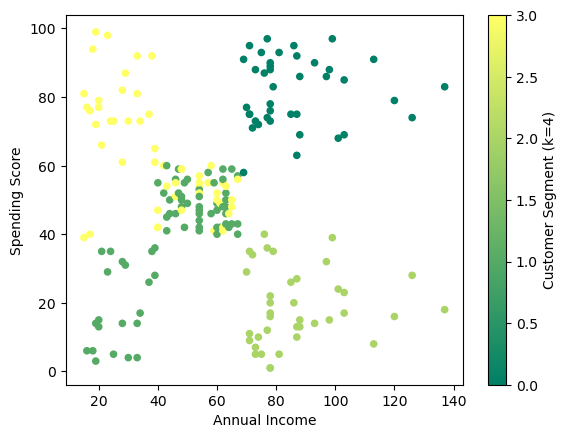

In [25]:
# Create a scatter plot with with x="Annual Income" and y="Spending Score (1-100)" with k=4 segments

df_shopping_predictions.plot.scatter(
    x="Annual Income",
    y="Spending Score",
    c="Customer Segment (k=4)",
    colormap='summer')


<Axes: xlabel='Annual Income', ylabel='Spending Score'>

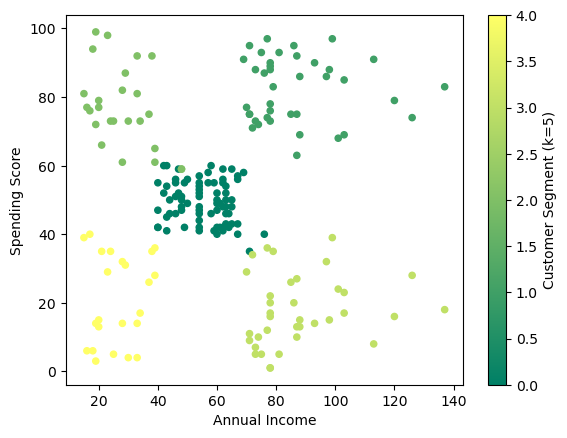

In [28]:
# Create a scatter plot with x="Annual Income" and y="Spending Scoree" with k=5 segments
df_shopping_predictions.plot.scatter(
    x="Annual Income",
    y="Spending Score",
    c="Customer Segment (k=5)",
    colormap='summer')


### Step 10: Answer the following question:

**Question**  Do you note any relevant differences between the two Kmeans models?

**Answer** 

In [29]:
#Less overlap with 5 segments versus 4